# Data Preprocessing

In [1]:
#importing required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

In [2]:
#Reading the West Nile Virus Incedence data
Data_WNV = pd.read_csv("WNV_NI_NNI_1999to2015_prevalence_incidence_final_20180530.csv", encoding="ISO-8859-1")
print(Data_WNV.shape)
Data_WNV.head()

(3108, 153)


,GEOID10,Select_County,STATEFP10,STATENS,STUSPS,STNAME,COUNTYFP10,COUNTYNS10,CTYNAME,POPESTIMATE1999,...,NIIR_2011_Z,NIIR_2012_Z,NIIR_2013_Z,NIIR_2014_Z,NIIR_2015_Z,NIIR_EST_AVG_Z,NIIR_EST_MED_Z,County_WNV_Class,County_WNV_Class2,filter_$
0,1001,1,1,1779775,AL,Alabama,1,161526,Autauga County,42963,...,-.172668378274114,-.313041876784145,-.237005866057391,-.211466937746909,-.197767338621807,-.230659201920693,-.231569016088473,2,NI-S,0
1,1003,1,1,1779775,AL,Alabama,3,161527,Baldwin County,137555,...,-.172668378274114,.0148439683883608,-.177634573907632,-.211466937746909,-.197767338621807,-.177866829768146,-.186748999098691,4,NI-M-pre12,0
2,1005,0,1,1779775,AL,Alabama,5,161528,Barbour County,28866,...,-.172668378274114,-.313041876784145,-.237005866057391,-.211466937746909,-.197767338621807,-.220130592240443,-.221517976917691,2,NI-S-NNI,0
3,1007,0,1,1779775,AL,Alabama,7,161529,Bibb County,20560,...,,,,,,,,3,NI-S,0
4,1009,0,1,1779775,AL,Alabama,9,161530,Blount County,50237,...,,,,,,,,1,NNI-S,0


In [3]:
#Function to get the name of the county and return a dataframe with all data for that county
def get_county_df(fn, GeoID=None):
    
    path = "narr_urban_county_data/air.sfc" #Path for folder containing monthly files
    all_years = glob.glob(path + "/*.csv")
    df_list = [] 
    
    for filename in all_years:
        temp_df = pd.read_csv(filename, index_col=None, header=0)
        temp_county_df = temp_df[temp_df["NAME"] == fn] #Creating a dataframe for a county for every year
        if GeoID != None:
            temp_county_df = temp_county_df[temp_county_df["GEOID"] == GeoID]
        year = filename[-11:-7]
        month = filename[-6:-4]
        temp_county_df.insert(6, "Year", year) #Adding year and month from filename for further use
        temp_county_df.insert(7, "Month", month) 
        df_list.append(temp_county_df) #Adding all yearly dataframes into a list for now

    Data_County = pd.concat(df_list, axis=0, ignore_index=True) #Concatinating year-wise data frames to create a final county df
    Data_County["Date"] = pd.to_datetime(Data_County[['Year','Month']].assign(DAY=1)) #Adding another date column of type datetime
    Data_County["Row_no"] = Data_County["Unnamed: 0"] #Renaming the unnamed column
    idx = pd.date_range('1999-01-01', '2015-12-01', freq='MS') #Specifying the datetime index
    Data_County = Data_County[["Row_no", "NAME", "Date", "Year", "Month", "max", "mean", "min", "GEOID"]] #Final columns in the dataframe
    Data_County = Data_County.sort_values(by=['Year', 'Month'])
    return Data_County

In [4]:
#Function to convert temperature from Kelvin to Centigrade
def K_to_C(Data_County):
    
    #Creating 3 new columns to store max, mean and min values in Centigrade
    Data_County['max_C'] = Data_County['max'].apply(lambda x: (x - 273.15))
    Data_County['mean_C'] = Data_County['mean'].apply(lambda x: (x - 273.15))
    Data_County['min_C'] = Data_County['min'].apply(lambda x: (x - 273.15))
    
    return Data_County

## Plotting the data

In [5]:
#Funtion to plot year-wise trend-lines for temperature for individual county
def plot_temp_graph(Data_County_df):

    ax = plt.subplot()
    for key, group in Data_County_df.groupby("Year"): #Plotting a line for every year
        ax.plot(group.Month, group.mean_C, label = key)
    my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] #Ticks for x-axis
    plt.xticks(group.Month, my_xticks) #Marking the x-axis ticks
    ax.set_xlabel('Month')
    ax.set_ylabel('Temperature in Centigrade')
    County_Name = Data_County_df['NAME'].iloc[0]
    plt.title(County_Name + " County")
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1.))
    plt.savefig(County_Name + '.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight') #Also saving the plot on pdf for later use
    plt.show()

### Cook County

In [6]:
#To get data only for "Cook" county
Data_Cook = get_county_df("Cook")
Data_Cook = K_to_C(Data_Cook)
print(Data_Cook.shape)
print(type(Data_Cook["Year"].iloc[0]))
print(type(Data_Cook["Date"].iloc[0]))
print(type(Data_Cook.Date[0]))
print(list(Data_Cook.columns))

(204, 12)
<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
['Row_no', 'NAME', 'Date', 'Year', 'Month', 'max', 'mean', 'min', 'GEOID', 'max_C', 'mean_C', 'min_C']


In [8]:
print(Data_Cook.head(12))

     Row_no  NAME       Date  Year Month         max        mean         min  \
55      163  Cook 1999-01-01  1999    01  274.234711  267.125586  264.533356   
68      163  Cook 1999-02-01  1999    02  274.385406  273.566162  272.846619   
65      163  Cook 1999-03-01  1999    03  275.458801  274.320947  273.577759   
101     163  Cook 1999-04-01  1999    04  285.789642  282.277124  274.178986   
98      163  Cook 1999-05-01  1999    05  291.209778  287.631616  278.308807   
79      163  Cook 1999-06-01  1999    06  296.014526  293.674414  287.122070   
85      163  Cook 1999-07-01  1999    07  298.889282  297.219946  292.115845   
114     163  Cook 1999-08-01  1999    08  294.997528  294.182031  293.428741   
112     163  Cook 1999-09-01  1999    09  293.056396  291.054199  289.492096   
102     163  Cook 1999-10-01  1999    10  285.716705  284.523828  283.467468   
97      163  Cook 1999-11-01  1999    11  281.893280  280.265381  279.320374   
82      163  Cook 1999-12-01  1999    12

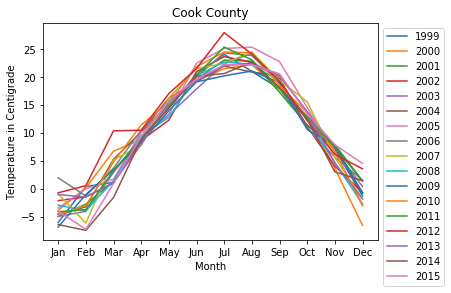

In [9]:
plot_temp_graph(Data_Cook)

#### The red line which has the lowest temperature in Feb is for the year 2002

In [10]:
Data_Cook[Data_Cook["Year"] == "2002"]

,Row_no,NAME,Date,Year,Month,max,mean,min,GEOID,max_C,mean_C,min_C
190,163,Cook,2002-01-01,2002,01,274.237671,271.041382,269.865692,17031,1.087671,-2.108618,-3.284308
180,163,Cook,2002-02-01,2002,02,273.729218,271.725024,269.334412,17031,0.579218,-1.424976,-3.815588
189,163,Cook,2002-03-01,2002,03,275.702240,274.187134,272.937103,17031,2.552240,1.037134,-0.212897
157,163,Cook,2002-04-01,2002,04,285.263702,281.841187,274.176208,17031,12.113702,8.691187,1.026208
168,163,Cook,2002-05-01,2002,05,288.545105,285.451904,278.320587,17031,15.395105,12.301904,5.170587
179,163,Cook,2002-06-01,2002,06,296.847168,294.129956,287.132080,17031,23.697168,20.979956,13.982080
170,163,Cook,2002-07-01,2002,07,298.375336,296.823877,292.117767,17031,25.225336,23.673877,18.967767
35,163,Cook,2002-08-01,2002,08,296.927338,295.841138,293.444977,17031,23.777338,22.691138,20.294977
47,163,Cook,2002-09-01,2002,09,294.807373,292.925049,291.357880,17031,21.657373,19.775049,18.207880
156,163,Cook,2002-10-01,2002,10,285.839081,284.283984,282.629669,17031,12.689081,11.133984,9.479669


### Queens County

     Row_no    NAME       Date  Year Month         max        mean  \
55      621  Queens 1999-01-01  1999    01  279.066620  275.791341   
68      621  Queens 1999-02-01  1999    02  278.372833  276.709513   
65      621  Queens 1999-03-01  1999    03  278.232239  277.837850   
101     621  Queens 1999-04-01  1999    04  284.433929  282.653971   
98      621  Queens 1999-05-01  1999    05  290.095612  287.561157   

            min  GEOID      max_C     mean_C      min_C  
55   274.069153  36081   5.916620   2.641341   0.919153  
68   275.732788  36081   5.222833   3.559513   2.582788  
65   277.620605  36081   5.082239   4.687850   4.470605  
101  279.986786  36081  11.283929   9.503971   6.836786  
98   284.188354  36081  16.945612  14.411157  11.038354  


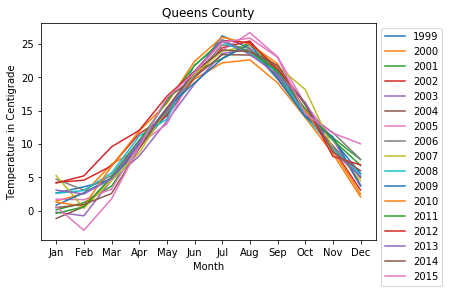

In [11]:
#To get data only for "Queens" county
Data_Queens = get_county_df("Queens")
Data_Queens = K_to_C(Data_Queens)
print(Data_Queens.head())
plot_temp_graph(Data_Queens)

### Pierce County

     Row_no    NAME       Date  Year Month         max        mean  \
55      805  Pierce 1999-01-01  1999    01  277.539673  274.376587   
68      805  Pierce 1999-02-01  1999    02  277.425293  273.781006   
65      805  Pierce 1999-03-01  1999    03  279.179565  275.553375   
101     805  Pierce 1999-04-01  1999    04  282.345642  279.502930   
98      805  Pierce 1999-05-01  1999    05  284.811829  282.188232   

            min  GEOID      max_C    mean_C     min_C  
55   271.078217  53053   4.389673  1.226587 -2.071783  
68   269.403534  53053   4.275293  0.631006 -3.746466  
65   270.806091  53053   6.029565  2.403375 -2.343909  
101  275.605011  53053   9.195642  6.352930  2.455011  
98   279.131378  53053  11.661829  9.038232  5.981378  


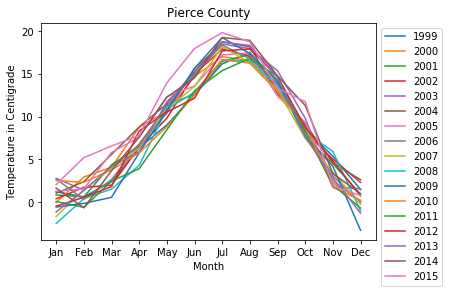

In [12]:
#To get data only for "Pierce" county
Data_Pierce = get_county_df("Pierce")
Data_Pierce = K_to_C(Data_Pierce)
print(Data_Pierce.head())
plot_temp_graph(Data_Pierce)

### Los Angeles County

     Row_no         NAME       Date  Year Month         max        mean  \
55       95  Los Angeles 1999-01-01  1999    01  287.460022  284.674279   
68       95  Los Angeles 1999-02-01  1999    02  287.169159  284.854849   
65       95  Los Angeles 1999-03-01  1999    03  287.643280  285.799992   
101      95  Los Angeles 1999-04-01  1999    04  290.019592  286.637714   
98       95  Los Angeles 1999-05-01  1999    05  298.860962  290.856070   

            min  GEOID      max_C     mean_C      min_C  
55   280.867035   6037  14.310022  11.524279   7.717035  
68   280.940918   6037  14.019159  11.704849   7.790918  
65   282.641510   6037  14.493280  12.649992   9.491510  
101  283.013885   6037  16.869592  13.487714   9.863885  
98   287.580750   6037  25.710962  17.706070  14.430750  


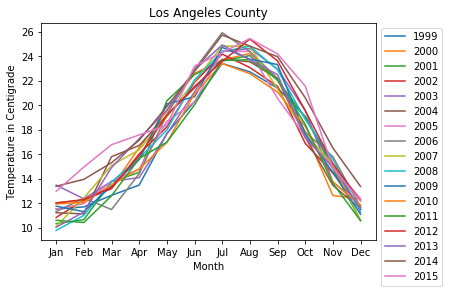

In [13]:
#To get data only for "Los Angeles" county
Data_LA = get_county_df("Los Angeles")
Data_LA = K_to_C(Data_LA)
print(Data_LA.head())
plot_temp_graph(Data_LA)

### Burleigh County

     Row_no      NAME       Date  Year Month         max        mean  \
55      116  Burleigh 1999-01-01  1999    01  258.760925  258.472705   
68      116  Burleigh 1999-02-01  1999    02  265.991974  265.777075   
65      116  Burleigh 1999-03-01  1999    03  274.164215  273.398730   
101     116  Burleigh 1999-04-01  1999    04  280.875580  280.637939   
98      116  Burleigh 1999-05-01  1999    05  288.019989  287.942139   

            min  GEOID      max_C     mean_C      min_C  
55   258.024292  38015 -14.389075 -14.677295 -15.125708  
68   265.382599  38015  -7.158026  -7.372925  -7.767401  
65   271.727722  38015   1.014215   0.248730  -1.422278  
101  280.509979  38015   7.725580   7.487939   7.359979  
98   287.866516  38015  14.869989  14.792139  14.716516  


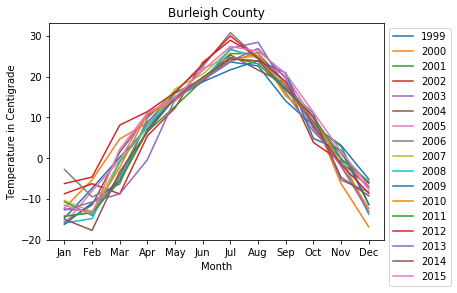

In [14]:
#To get data only for "Burleigh" county
Data_Burleigh = get_county_df("Burleigh")
Data_Burleigh = K_to_C(Data_Burleigh)
print(Data_Burleigh.head())
plot_temp_graph(Data_Burleigh)

### Maricopa County

     Row_no      NAME       Date  Year Month         max        mean  \
55      220  Maricopa 1999-01-01  1999    01  285.379639  283.239172   
68      220  Maricopa 1999-02-01  1999    02  287.979431  286.101562   
65      220  Maricopa 1999-03-01  1999    03  292.621613  290.217027   
101     220  Maricopa 1999-04-01  1999    04  295.056580  292.254653   
98      220  Maricopa 1999-05-01  1999    05  302.405579  299.655503   

            min  GEOID      max_C     mean_C      min_C  
55   280.039673   4013  12.229639  10.089172   6.889673  
68   281.994781   4013  14.829431  12.951563   8.844781  
65   286.247864   4013  19.471613  17.067027  13.097864  
101  286.926117   4013  21.906580  19.104653  13.776117  
98   294.914154   4013  29.255579  26.505503  21.764154  


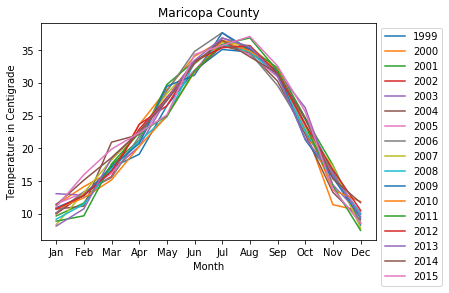

In [15]:
#To get data only for "Maricopa" county
Data_Maricopa = get_county_df("Maricopa")
Data_Maricopa = K_to_C(Data_Maricopa)
print(Data_Maricopa.head())
plot_temp_graph(Data_Maricopa)

### Dallas County

     Row_no    NAME       Date  Year Month         max        mean  \
55      670  Dallas 1999-01-01  1999    01  283.489014  282.765778   
68      670  Dallas 1999-02-01  1999    02  286.981384  286.570465   
65      670  Dallas 1999-03-01  1999    03  287.661438  287.253174   
101     670  Dallas 1999-04-01  1999    04  293.819336  293.440308   
98      670  Dallas 1999-05-01  1999    05  297.218597  297.143677   

            min  GEOID      max_C     mean_C      min_C  
55   282.186096  48113  10.339014   9.615778   9.036096  
68   286.256226  48113  13.831384  13.420465  13.106226  
65   286.939392  48113  14.511438  14.103174  13.789392  
101  293.083649  48113  20.669336  20.290308  19.933649  
98   297.075684  48113  24.068597  23.993677  23.925684  


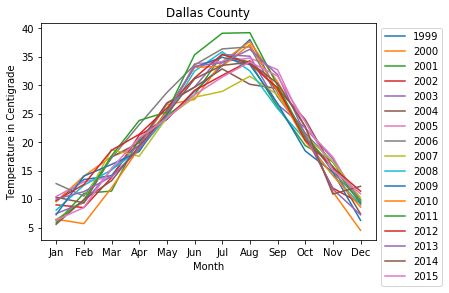

In [16]:
Data_Dallas = get_county_df("Dallas",48113)
Data_Dallas = K_to_C(Data_Dallas)
print(Data_Dallas.head())
plot_temp_graph(Data_Dallas)

### Wayne County

     Row_no   NAME       Date  Year Month         max        mean         min  \
55       70  Wayne 1999-01-01  1999    01  267.048492  266.572632  266.216583   
68       70  Wayne 1999-02-01  1999    02  273.779083  272.487366  269.791077   
65       70  Wayne 1999-03-01  1999    03  274.972931  273.402100  270.267792   
101      70  Wayne 1999-04-01  1999    04  285.284180  282.281891  276.478180   
98       70  Wayne 1999-05-01  1999    05  292.815857  289.406799  285.213562   

     GEOID      max_C     mean_C      min_C  
55   26163  -6.101508  -6.577368  -6.933417  
68   26163   0.629083  -0.662634  -3.358923  
65   26163   1.822931   0.252100  -2.882208  
101  26163  12.134180   9.131891   3.328180  
98   26163  19.665857  16.256799  12.063562  


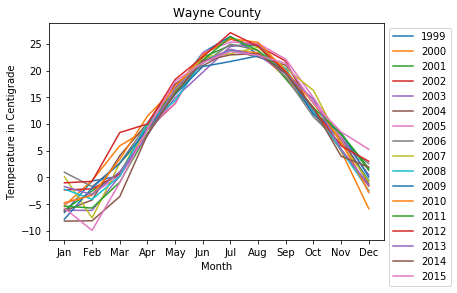

In [17]:
Data_Wayne = get_county_df("Wayne",26163)
Data_Wayne = K_to_C(Data_Wayne)
print(Data_Wayne.head())
plot_temp_graph(Data_Wayne)

### Duval County

     Row_no   NAME       Date  Year Month         max        mean         min  \
55      331  Duval 1999-01-01  1999    01  294.349152  291.148163  287.947174   
68      331  Duval 1999-02-01  1999    02  294.034943  291.639709  289.244507   
65      331  Duval 1999-03-01  1999    03  293.110260  291.098694  289.087097   
101     331  Duval 1999-04-01  1999    04  296.293549  295.724792  295.156067   
98      331  Duval 1999-05-01  1999    05  298.516205  297.651184  296.786133   

     GEOID      max_C     mean_C      min_C  
55   12031  21.199152  17.998163  14.797174  
68   12031  20.884943  18.489709  16.094507  
65   12031  19.960260  17.948694  15.937097  
101  12031  23.143549  22.574792  22.006067  
98   12031  25.366205  24.501184  23.636133  


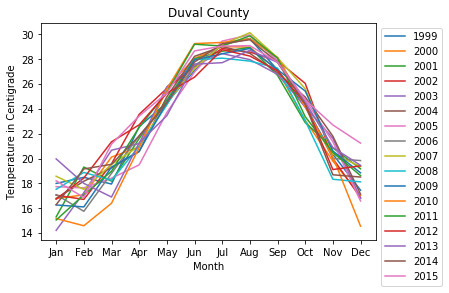

In [18]:
Data_Duval = get_county_df("Duval")
Data_Duval = K_to_C(Data_Duval)
print(Data_Duval.head())
plot_temp_graph(Data_Duval)

### Middlesex County

     Row_no       NAME       Date  Year Month         max        mean  \
55      354  Middlesex 1999-01-01  1999    01  271.056549  270.038843   
68      354  Middlesex 1999-02-01  1999    02  273.017944  271.715796   
65      354  Middlesex 1999-03-01  1999    03  275.589874  274.874585   
101     354  Middlesex 1999-04-01  1999    04  282.541473  281.789673   
98      354  Middlesex 1999-05-01  1999    05  288.333771  287.791919   

            min  GEOID      max_C     mean_C      min_C  
55   267.890961  25017  -2.093451  -3.111157  -5.259039  
68   269.606384  25017  -0.132056  -1.434204  -3.543616  
65   273.147583  25017   2.439874   1.724585  -0.002417  
101  280.215179  25017   9.391473   8.639673   7.065179  
98   286.493042  25017  15.183771  14.641919  13.343042  


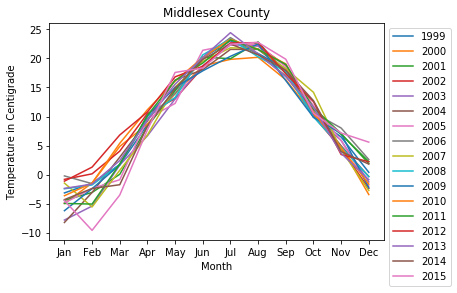

In [19]:
Data_Middlesex = get_county_df("Middlesex",25017)
Data_Middlesex = K_to_C(Data_Middlesex)
print(Data_Middlesex.head())
plot_temp_graph(Data_Middlesex)

     Row_no  NAME       Date  Year Month         max        mean         min  \
55      435  Kern 1999-01-01  1999    01  283.590057  281.203156  278.076721   
68      435  Kern 1999-02-01  1999    02  285.168884  281.774200  277.782715   
65      435  Kern 1999-03-01  1999    03  287.756683  284.484222  278.483246   
101     435  Kern 1999-04-01  1999    04  291.823517  287.381531  281.122986   
98      435  Kern 1999-05-01  1999    05  299.801239  295.493652  289.089050   

     GEOID      max_C     mean_C      min_C  
55    6029  10.440057   8.053156   4.926721  
68    6029  12.018884   8.624200   4.632715  
65    6029  14.606683  11.334222   5.333246  
101   6029  18.673517  14.231531   7.972986  
98    6029  26.651239  22.343652  15.939050  


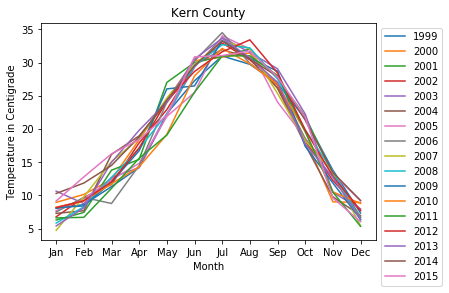

In [20]:
#Check for non-border counties
#Test 1

Data_Kern = get_county_df("Kern")
Data_Kern = K_to_C(Data_Kern)
print(Data_Kern.head())
plot_temp_graph(Data_Kern)

     Row_no   NAME       Date  Year Month         max        mean         min  \
55      174  Marin 1999-01-01  1999    01  284.593353  283.179159  281.533875   
68      174  Marin 1999-02-01  1999    02  284.144318  282.826416  281.027985   
65      174  Marin 1999-03-01  1999    03  284.149078  283.510335  282.519562   
101     174  Marin 1999-04-01  1999    04  285.865692  284.600444  283.659454   
98      174  Marin 1999-05-01  1999    05  289.830475  286.173523  283.202454   

     GEOID      max_C     mean_C      min_C  
55    6041  11.443353  10.029159   8.383875  
68    6041  10.994318   9.676416   7.877985  
65    6041  10.999078  10.360335   9.369562  
101   6041  12.715692  11.450444  10.509454  
98    6041  16.680475  13.023523  10.052454  


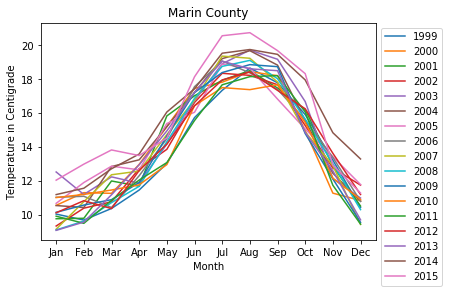

In [68]:
#Test 2 - Border county

Data_Marin = get_county_df("Marin")
Data_Marin = K_to_C(Data_Marin)
print(Data_Marin.head())
plot_temp_graph(Data_Marin)

     Row_no    NAME       Date  Year Month         max        mean  \
55      278  Solano 1999-01-01  1999    01  281.855957  281.658936   
68      278  Solano 1999-02-01  1999    02  281.860291  281.530151   
65      278  Solano 1999-03-01  1999    03  283.445190  283.056793   
101     278  Solano 1999-04-01  1999    04  285.865692  285.703125   
98      278  Solano 1999-05-01  1999    05  291.539917  290.203278   

            min  GEOID      max_C     mean_C      min_C  
55   281.389954   6095   8.705957   8.508936   8.239954  
68   281.027985   6095   8.710291   8.380151   7.877985  
65   282.519562   6095  10.295190   9.906793   9.369562  
101  285.341736   6095  12.715692  12.553125  12.191736  
98   289.612244   6095  18.389917  17.053278  16.462244  


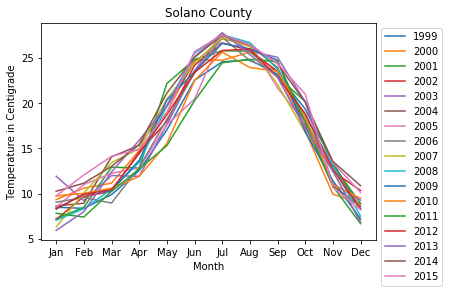

In [21]:
#Test 2 - Inland county

Data_Solano = get_county_df("Solano")
Data_Solano = K_to_C(Data_Solano)
print(Data_Solano.head())
plot_temp_graph(Data_Solano)


     Row_no     NAME       Date  Year Month         max        mean  \
55       20  Volusia 1999-01-01  1999    01  296.370575  292.367480   
68       20  Volusia 1999-02-01  1999    02  296.471069  292.295728   
65       20  Volusia 1999-03-01  1999    03  296.060638  292.325854   
101      20  Volusia 1999-04-01  1999    04  298.487061  297.412402   
98       20  Volusia 1999-05-01  1999    05  298.892487  298.549927   

            min  GEOID      max_C     mean_C      min_C  
55   290.549500  12127  23.220575  19.217480  17.399500  
68   290.564819  12127  23.321069  19.145728  17.414819  
65   290.461578  12127  22.910638  19.175854  17.311578  
101  295.958130  12127  25.337061  24.262402  22.808130  
98   297.876862  12127  25.742487  25.399927  24.726862  


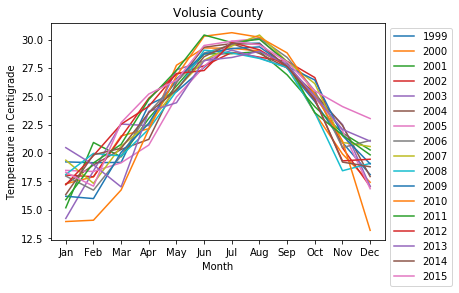

In [22]:
#Test 3 - 

Data_Volusia = get_county_df("Volusia")
Data_Volusia = K_to_C(Data_Volusia)
print(Data_Volusia.head())
plot_temp_graph(Data_Volusia)

     Row_no  NAME       Date  Year Month         max        mean         min  \
55      529  Polk 1999-01-01  1999    01  293.222382  292.205518  291.387207   
68      529  Polk 1999-02-01  1999    02  292.654358  292.107861  291.393219   
65      529  Polk 1999-03-01  1999    03  293.293488  292.655933  292.076508   
101     529  Polk 1999-04-01  1999    04  299.952667  299.469629  298.778961   
98      529  Polk 1999-05-01  1999    05  300.573944  299.963525  299.300232   

     GEOID      max_C     mean_C      min_C  
55   12105  20.072382  19.055518  18.237207  
68   12105  19.504358  18.957861  18.243219  
65   12105  20.143488  19.505933  18.926508  
101  12105  26.802667  26.319629  25.628961  
98   12105  27.423944  26.813525  26.150232  


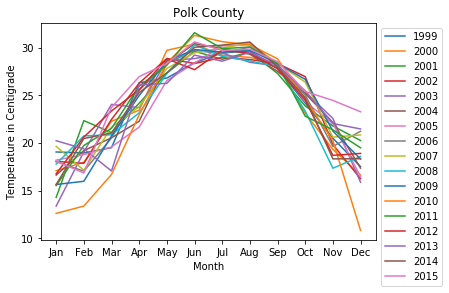

In [23]:
#Test 4

Data_Polk = get_county_df("Polk",12105)
Data_Polk = K_to_C(Data_Polk)
print(Data_Polk.head())
plot_temp_graph(Data_Polk)